In [1]:
%matplotlib inline

from src.treebank.syntax import *
import seaborn as sns
import pandas as pd

# Date resources

UNIVERSAL_DEPENDENCY_VERSION = "1.2"
FILE_TO_USE = "train"
LATINS = ["UD_Latin", "UD_Latin-ITT", "UD_Latin-PROIEL"]
GREEKS = ["UD_Ancient_Greek", "UD_Ancient_Greek-PROIEL"]

# Data Loading
Language = {}
Language["lat"] = Lang(folders=[
    "resources/universal-dependencies-{0}/{1}".format(
        UNIVERSAL_DEPENDENCY_VERSION,
        latin
    ) for latin in LATINS
], filter="filter_punct")

/home/thibault/dev/thesis/env/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Absolute Square Distances

/home/thibault/dev/thesis/env/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


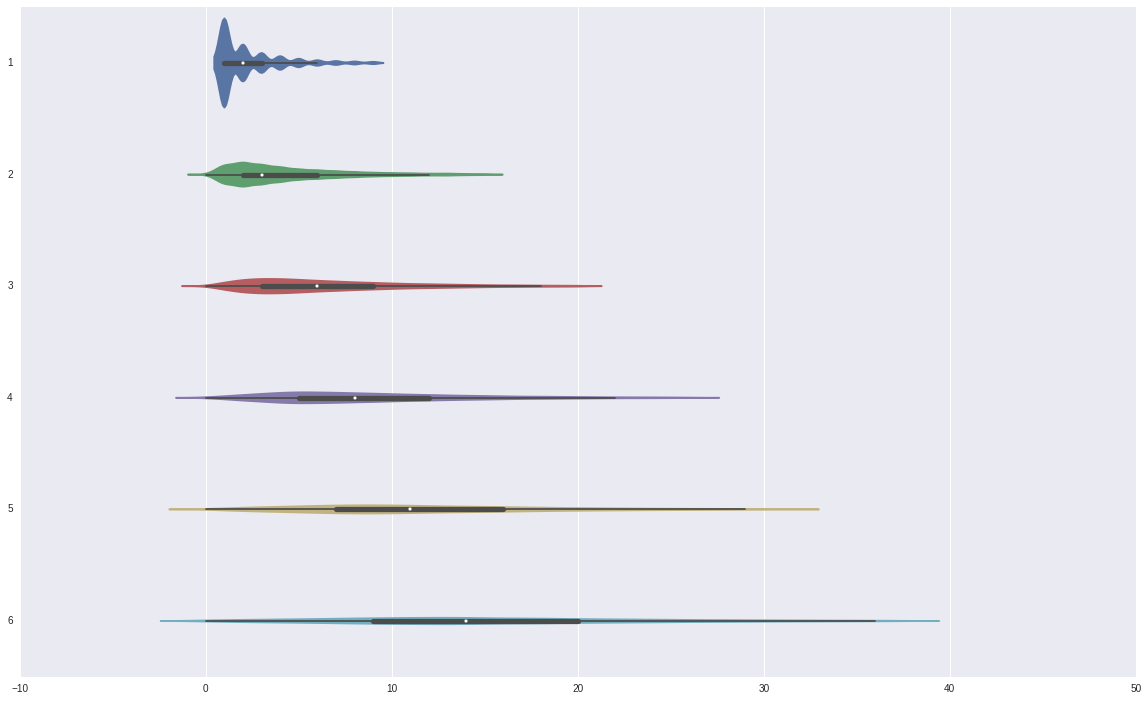

In [9]:
Distances = pd.DataFrame({
    str(x): pd.Series(Language["lat"].distance(x, flatten=True)) for x in range(1,7)
})
sns.set_context("notebook")
plt.figure(figsize=(20, 12))

df = Distances
#keep only the ones that are within +3 to -3 standard deviations
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)] 
ax = sns.violinplot(data=df, orient="h")

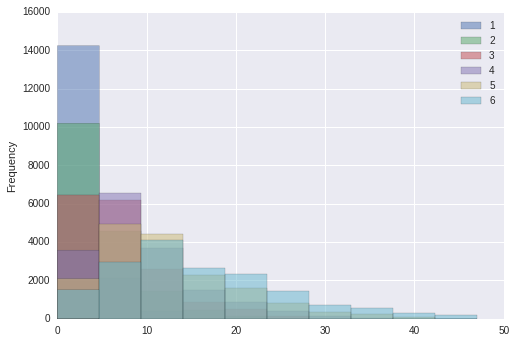

In [3]:
df = Distances#.cumsum()
#keep only the ones that are within +3 to -3 standard deviations
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)] 
plot = df.plot(kind='hist', alpha=0.5)

## Relative Square Distances

/home/thibault/dev/thesis/env/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


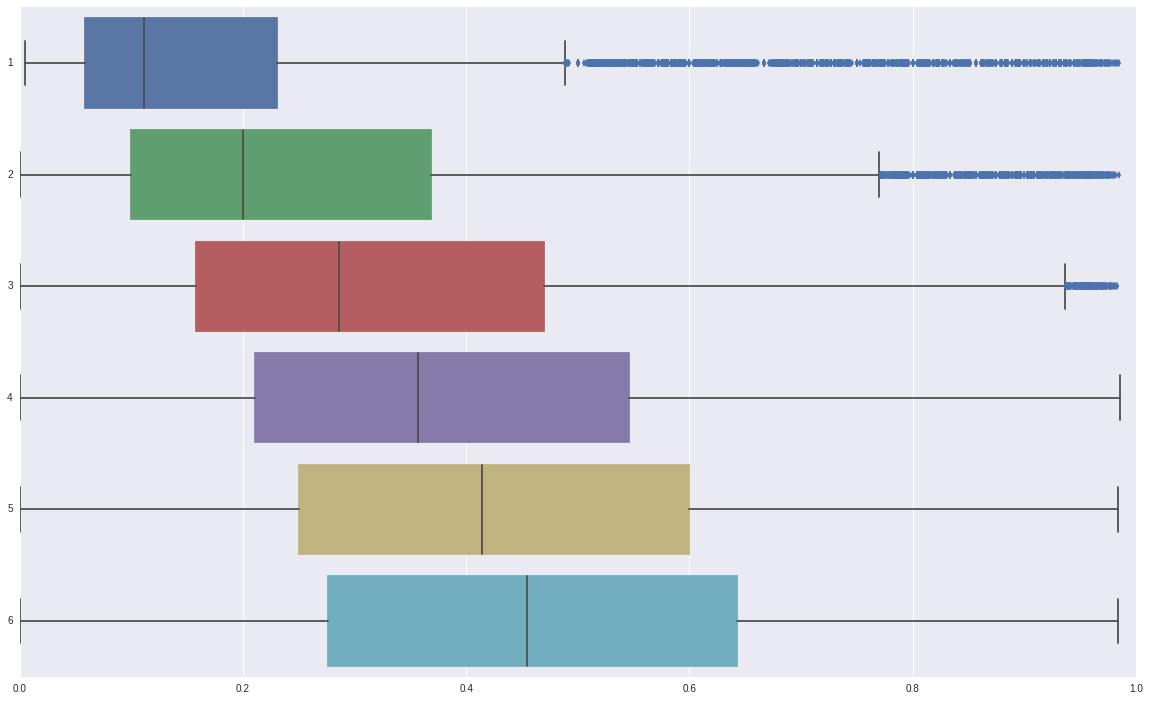

In [7]:
Distances = pd.DataFrame({
    str(x): pd.Series(Language["lat"].distance(x, flatten=True, relative=True)) for x in range(1,7)
})
sns.set_context("notebook")
plt.figure(figsize=(20, 12))

ax = sns.boxplot(data=Distances, orient="h")

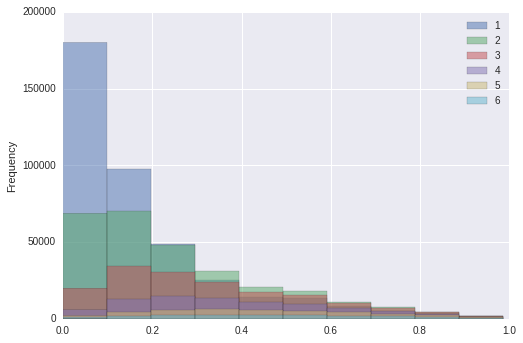

In [6]:
df = Distances#.cumsum()
#keep only the ones that are within +3 to -3 standard deviations
plot = df.plot(kind='hist', alpha=0.5)